In [20]:
import matplotlib as mpl
import matplotlib.pylab as plt
import numpy as np
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import qutip as qtp
%matplotlib inline
%matplotlib widget 
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [35]:
wa=2*np.pi 
wc=2*np.pi
wL=np.linspace(0,4*np.pi,200) #pump frequency list over which we will operate
beta=np.sqrt(10.0) #coherent pump eigenstate
g= 0.05 * 2 * np.pi #coupling strength
kappa=0.005 #cavity dissipation rate
gamma=0.05 #atom dissipation rate
omega=np.sqrt(kappa/(2*np.pi))*beta
nth=0.0 #average number of thermal photons 
N=50 #Number of cavity Fock States (we can try different values but one must have in mind that a bigger Hilbert state will be slower in calculations (Though more formally correct))

We want to add a coherent pump to our system. In order to achieve this we will work with a time dependant hamiltonian. We will write the Hamiltonian in the rotating frame. The coherent pump Hamiltonian can be written as:

$H_{laser}=\omega_ca^{\dagger}a+\Omega(ae^{i\omega_Lt}+a^{\dagger}e^{-i\omega_Lt})$

If we work in the rotating frame we can eliminate the time dependance form the hamiltonian, dodging the problemas that come with a time dependant Hamiltonian. In the rotating frame, the Hamiltonian takes the form:

$H_{laser}=(\omega_c-\omega_L)a^{\dagger}a+\Omega(a+a^{\dagger})$

In this expression one must be careful to identify the different parameters. $\omega_L$ is the frequency of the coherent pump, $\omega_c$ is the cavity frequency, and $\Omega$ is the amplitude of the pump, which depends on the eigenvalue of the coherent state. 

Also, we have to bear in mind that the Hamiltonian we will work with will take the form:

$H_{total}=(\omega_c-\omega_L)a^{\dagger}a+(\omega_a-\omega_L)\sigma^{\dagger}\sigma+g(a^{\dagger}\sigma+a\sigma^{\dagger})+\Omega(a+a^{\dagger})$

In [36]:
#INITIAL STATE will be an excited atom in the cavity in a coherent state (A laser driven cavity)
#psi_i=qtp.tensor(qtp.basis(N,0),qtp.basis(2,1))
#We also will define the operators to work more confortably
a=qtp.tensor(qtp.destroy(N),qtp.qeye(2))
sm=qtp.tensor(qtp.qeye(N),qtp.destroy(2))
#hamiltonian: Some parts will be time dependent (The coherent drive)
H=[]
for j in range(len(wL)):
    H.append((wc-wL[j])*a.dag()*a+(wa-wL[j])*sm.dag()*sm+g*(a.dag()*sm+a*sm.dag())+omega*(a+a.dag()))

**Is it intuitive that the steady state is independent of the initial state of the system?**

In [37]:
collapse=[]
#cavity relaxation
rate=kappa*(1+nth)
if rate>0.0:
    collapse.append(np.sqrt(rate)*a)
#cavity excitation
rate=kappa*nth
if rate>0.0:
    collapse.append(np.sqrt(rate)*a.dag())
#atom decay (excited to ground)
rate=gamma
if rate>0.0:
    collapse.append(np.sqrt(rate)*sm)

In [38]:
final_statesDM=[]
for r in range(len(wL)):
    final_statesDM.append(qtp.steadystate(H[r],collapse))

In [39]:
popexp=[] #qubit population in the steady state for all the frequency pumps
cavst=[] #cavity photon number
for k in range(len(wL)):
    popexp.append(qtp.expect(sm.dag()*sm,final_statesDM[k]))
    cavst.append(qtp.expect(a.dag()*a,final_statesDM[k]))

Text(0, 0.5, 'Ocupation probability')

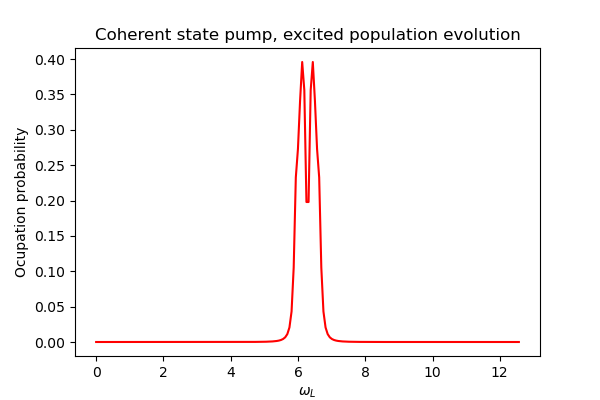

In [40]:
plt.figure(figsize=(6, 4))
plt.plot(wL,popexp,'r')
plt.title("Coherent state pump, excited population evolution")
plt.xlabel("$\omega_L$")
plt.ylabel("Ocupation probability")

What are we looking at?
Key aspects that I see:

-There seems to be a symmetry around the value of 2$\pi$ which is the frequency we set for the cavity AND the natural frequency we set for the two level atom


Text(0, 0.5, 'Photon number expectation')

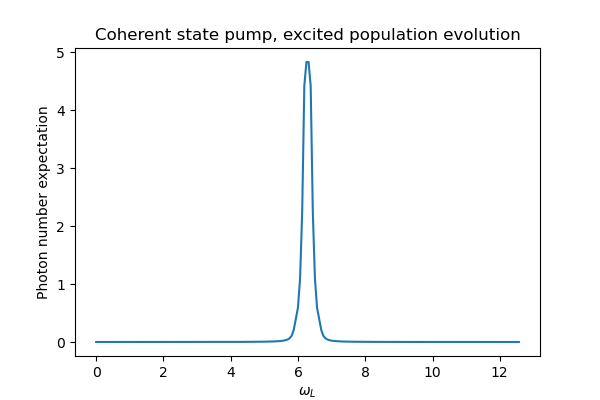

In [41]:
plt.figure(figsize=(6, 4))
plt.plot(wL,cavst)
plt.title("Coherent state pump, excited population evolution")
plt.xlabel("$\omega_L$")
plt.ylabel("Photon number expectation")

Again, key aspects:

-Frequency $2\pi$ seems to have a special meaning (probably that it is the frequency we have set for the atom and cavity as natural frequencies) 
**Could it be interesting to change one of them and see if the graph changes only for one of these two?**



In [50]:
wa2=3*np.pi #change in value to see if the peaks change place
wc2=1*np.pi
H2=[]
for j in range(len(wL)):
    H2.append((wc2-wL[j])*a.dag()*a+(wa2-wL[j])*sm.dag()*sm+g*(a.dag()*sm+a*sm.dag())+omega*(a+a.dag()))

In [51]:
final_statesDM2=[]
for r in range(len(wL)):
    final_statesDM2.append(qtp.steadystate(H2[r],collapse))

In [52]:
popexp2=[] #qubit population in the steady state for all the frequency pumps
cavst2=[] #cavity photon number
for k in range(len(wL)):
    popexp2.append(qtp.expect(sm.dag()*sm,final_statesDM2[k]))
    cavst2.append(qtp.expect(a.dag()*a,final_statesDM2[k]))

If this works, I should expect the previous plot's middle point to shift to a position in which the symmetry revolves around the new value of $\omega_a$ as a resonance.

Text(0, 0.5, 'Ocupation probability')

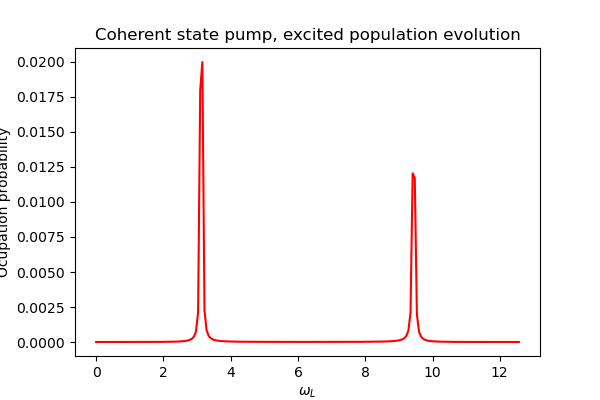

In [53]:
plt.figure(figsize=(6, 4))
plt.plot(wL,popexp2,'r')
plt.title("Coherent state pump, excited population evolution")
plt.xlabel("$\omega_L$")
plt.ylabel("Ocupation probability")

Text(0, 0.5, 'Photon number expectation')

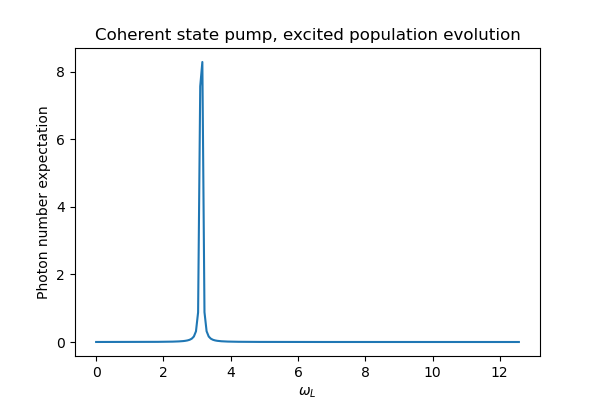

In [54]:
plt.figure(figsize=(6, 4))
plt.plot(wL,cavst2)
plt.title("Coherent state pump, excited population evolution")
plt.xlabel("$\omega_L$")
plt.ylabel("Photon number expectation")